<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/ps6_by_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# 1st project: exploring the interaction between quality of governance, people's happiness, and political unrests in the west sahel region of west africa.

## research questions:

1. how does governance affect people's happiness in west sahel region of africa?

2. Whether people's unhappiness contributes to political unrests in west sahel region of africa?

## choosen datasets:

Freqencies of local terrorist activities by country:https://www.visionofhumanity.org/public-release-data/

World Happiness index 2023: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023

Global positvie peace index: https://www.visionofhumanity.org/public-release-data/ (it contains a lot of variables about quality of governance)

**Note:** in the dataset of **Global Positive Peace Index,** high indexes mean weak insititutional capacities or high severity of issues. i.e **higher index** of Well-Functioning government in a country means government in the country is **less functional.**


## Importing the 3 datasets:


In [95]:
happiness=pd.read_excel('https://github.com/shimjide123/datman/raw/main/WHR2023(sahel).xls')
 #dataset of World Happiness index in 11 countries on West sahel region in Africa

In [96]:
happiness.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860


In [97]:
governance=pd.read_excel('https://github.com/shimjide123/datman/raw/main/PPI-newest(sahel).xlsx')
#dataset of Global Positive Peace index in the 11 countries of West sahel region of Africa.

In [98]:
governance.head()

,Country,Region,PPI Overall Score,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness
0,Benin,sub-Saharan Africa,3.258,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097
1,Burkina Faso,sub-Saharan Africa,3.436,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844
2,Cameroon,sub-Saharan Africa,4.005,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061
3,Chad,sub-Saharan Africa,4.374,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916
4,Gambia,sub-Saharan Africa,3.553,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924


In [99]:
violence=pd.read_excel("https://github.com/shimjide123/datman/raw/main/GTI-newest(sahel).xlsx")
#dataset of Frequencies of political violence/activities in 11 countries of west sahel region of Africa

In [100]:
violence.head()

,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages
0,Burkina Faso,2,8.564101,310,1135,496,84
1,Mali,4,8.412392,272,944,376,24
2,Nigeria,8,8.064811,120,385,147,59
3,Niger,10,7.616207,54,198,118,16
4,Cameroon,11,7.347002,116,166,53,65


##merge: I will be using fuzzy wazzy

Below are the Fuzzy wuzz codes I will use. They are copied from PS 4 but I will change them later for the datasets

In [101]:
!pip install fuzzywuzzy
#import fuzzywuzzy
#from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [102]:
import numpy as np

In [103]:
happiness["matches"] = happiness["Country"].map(lambda x: process.extract(x,governance["Country"].to_list(),limit=3)) #skim thru to make sure it mostly makes sense
happiness

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,"[(Benin, 100), (Niger, 40), (Sierra Leone, 40)]"
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,"[(Burkina Faso, 100), (Guinea, 60), (Mauritani..."
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,"[(Cameroon, 100), (Chad, 45), (Sierra Leone, 45)]"
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,"[(Chad, 100), (Cameroon, 45), (Guinea, 26)]"
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,"[(Gambia, 100), (Nigeria, 46), (Mali, 45)]"
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,"[(Guinea, 100), (Burkina Faso, 60), (Gambia, 50)]"
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,"[(Mali, 100), (Senegal, 51), (Gambia, 45)]"
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,"[(Mauritania, 100), (Burkina Faso, 45), (Gambi..."
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,"[(Niger, 100), (Nigeria, 83), (Sierra Leone, 54)]"
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,"[(Nigeria, 100), (Niger, 83), (Sierra Leone, 53)]"


In [104]:
happiness['full']=np.nan
for i in happiness.index:
  happiness['full'][i]=happiness.matches[i][0][1]
happiness[happiness['full'] < 100]
#looks like none of the variables is unmerged

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches,full


In [105]:
happiness["best_match"] = happiness["Country"].map(lambda x: process.extractOne(x,governance["Country"])[0] )

In [106]:
governance["best_match"] = governance["Country"].map(lambda x: process.extractOne(x,happiness["Country"])[0] )

In [107]:
happiness_governance=pd.merge(happiness,governance,how='outer',on=['best_match'],indicator=True)
happiness_governance.head()

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924,both


In [108]:
happiness_governance['_merge'].value_counts() #all merged without flaw!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

In [109]:
violence["best_match"] = violence["Country"].map(lambda x: process.extractOne(x,happiness_governance["Country_x"])[0] )
#to merge on "best_match" later

In [110]:
happiness_governance=happiness_governance.drop(columns=['_merge']) # for the sake of merging

In [111]:
happiness_governance_violence=pd.merge(happiness_governance, violence,how='outer',indicator=True, on='best_match')
happiness_governance_violence

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Regulatory Quality,Government effectiveness,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.084653,3.411097,Benin,28,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.085141,3.696844,Burkina Faso,2,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,3.502110,3.745061,Cameroon,11,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,3.772593,4.424916,Chad,19,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.352093,3.581924,The Gambia,93,0.000000,0,0,0,0,both
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,...,3.449184,3.715035,Guinea,93,0.000000,0,0,0,0,both
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,...,3.267190,3.964678,Mali,4,8.412392,272,944,376,24,both
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,...,3.439483,3.462843,Mauritania,87,0.290979,0,0,0,0,both
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,...,3.355596,3.735096,Niger,10,7.616207,54,198,118,16,both
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,...,3.533560,3.993615,Nigeria,8,8.064811,120,385,147,59,both


In [112]:
happiness_governance_violence['_merge'].value_counts() # all the variables of the 3 datasets are merged!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

In [113]:
happiness_governance_violence.dtypes

Country_x                                                           object
year                                                                 int64
Life Ladder                                                        float64
Social support                                                     float64
Healthy life expectancy at birth                                   float64
Freedom to make life choices                                       float64
Generosity                                                         float64
Perceptions of corruption                                          float64
Positive affect                                                    float64
Negative affect                                                    float64
matches                                                             object
full                                                               float64
best_match                                                          object
Country_y                

In [114]:
happiness_governance_violence=happiness_governance_violence.drop(columns=['matches','best_match','Country_y','Country','Rank','Region'])

In [115]:
happiness_governance_violence.rename(columns={'Country_x': 'Country'}, inplace=True)

In [118]:
happiness_governance_violence.rename(columns={'Score': 'terrorist index'}, inplace=True)
#higher terrorist index means higher intensity of local political violence

In [119]:
happiness_governance_violence.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness,terrorist index,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,2,2.312753,3.084653,3.411097,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3,4.147212,3.085141,3.696844,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,5,2.295775,3.502110,3.745061,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,5,3.842369,3.772593,4.424916,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,4,4.807062,3.352093,3.581924,0.000000,0,0,0,0,both


##Regression and plotting

###Multiple Regression for the 1st research question:

Part 1:

Independent variable: Well-Functioning Government

Dependent variables:
access to public services;
law to support euqal treatment of population segments;
equitable distribution of resources;
Regulatory quality;
Share of youth not in employment, education or training (NEET)

This aims to test whether the level of governance facilitates the capacity of society to meet the needs of local people.

**Note:** in the dataset of **Positive Peace Index (dataset "governance"),** high indexes mean weak insititutional capacities or high severity of issues. i.e **higher index** of Well-Functioning government in a country means government in the country is **less functional.**


In [187]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y1=happiness_governance_violence[['Access to public Services']]
X_badgov= sm.add_constant(X_badgov)

#badgov here means variable of "bad governance". In dataset of Positive Peace Index, higher index means lower institutional capacity.

In [188]:
regression_X_badgov_Y1 = linear_model.LinearRegression()
model =regression_X_badgov_Y1.fit(X_badgov, Y1)

In [189]:
regression_X_badgov_Y1 = sm.OLS(Y1, X_badgov)
X_badgov_Y1_res =regression_X_badgov_Y1.fit()
X_badgov_Y1_res.summary()
#Coefficient of access to services on Well-Functioning government is positive, meaning less functional government may contribute to less accessible social services.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Access to public Services   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.476
Method:                        Least Squares   F-statistic:                     11.00
Date:                       Tue, 05 Dec 2023   Prob (F-statistic):            0.00780
Time:                               05:30:17   Log-Likelihood:                -4.7676
No. Observations:                         12   AIC:                             13.54
Df Residuals:                             10   BIC:                             14.51
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4026      0.964      0.418      0.685      -1.745       2.551
Well-Functioning Government     0.8998      0.271      3.316      0.008       0.295       1.504
==============================================================================
Omnibus:                        2.723   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.018
Skew:                          -0.122   Prob(JB):                        0.601
Kurtosis:                       1.594   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

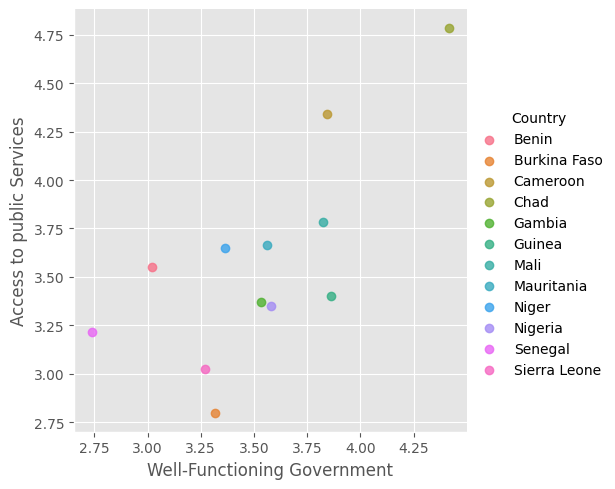

In [202]:
sns.lmplot(x="Well-Functioning Government", y="Access to public Services", hue="Country", data=happiness_governance_violence);

In [120]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y2=happiness_governance_violence[['Law to support equal treatment of population segments']]
X_badgov= sm.add_constant(X_badgov)

In [121]:
regression_X_badgov_Y2 = sm.OLS(Y2, X_badgov)
X_badgov_Y2_res =regression_X_badgov_Y2.fit()
X_badgov_Y2_res.summary()
#Coefficient of law for equality on Well-Functioning government is positive, meaning less functional government may undermine policy-making for social equity.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              OLS Regression Results                                             
=================================================================================================================
Dep. Variable:     Law to support equal treatment of population segments   R-squared:                       0.724
Model:                                                               OLS   Adj. R-squared:                  0.696
Method:                                                    Least Squares   F-statistic:                     26.23
Date:                                                   Tue, 05 Dec 2023   Prob (F-statistic):           0.000450
Time:                                                           03:36:54   Log-Likelihood:                -7.3512
No. Observations:                                                     12   AIC:                             18.70
Df Residuals:                                                         10   BIC:                             19.67
Df Model:                                                              1                                         
Covariance Type:                                               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4139      1.196     -2.019      0.071      -5.078       0.250
Well-Functioning Government     1.7234      0.337      5.121      0.000       0.974       2.473
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.417
Skew:                           0.259   Prob(JB):                        0.812
Kurtosis:                       2.248   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y3=happiness_governance_violence[['Equitable Distribution of Resources']]
X_badgov= sm.add_constant(X_badgov)

In [123]:
regression_X_badgov_Y3 = sm.OLS(Y3, X_badgov)
X_badgov_Y3_res =regression_X_badgov_Y3.fit()
X_badgov_Y3_res.summary()
#Coefficient of resource distribution on Well-Functioning government is positive, meaning less functional government may result in less equal distribution.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Equitable Distribution of Resources   R-squared:                       0.750
Model:                                             OLS   Adj. R-squared:                  0.725
Method:                                  Least Squares   F-statistic:                     30.01
Date:                                 Tue, 05 Dec 2023   Prob (F-statistic):           0.000270
Time:                                         03:36:59   Log-Likelihood:                 2.8525
No. Observations:                                   12   AIC:                            -1.705
Df Residuals:                                       10   BIC:                           -0.7351
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9355      0.511      1.831      0.097      -0.203       2.074
Well-Functioning Government     0.7877      0.144      5.478      0.000       0.467       1.108
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.492
Skew:                          -0.478   Prob(JB):                        0.782
Kurtosis:                       2.734   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y4=happiness_governance_violence[['Share of youth not in employment, education or training (NEET)']]
X_badgov= sm.add_constant(X_badgov)

In [125]:
regression_X_badgov_Y4 = sm.OLS(Y4, X_badgov)
X_badgov_Y4_res =regression_X_badgov_Y3.fit()
X_badgov_Y4_res.summary()
#Coefficient of youth unemployment rate on Well-Functioning government is positive, meaning less functional government may undermine youth from accessing opportunities for survival and development.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Equitable Distribution of Resources   R-squared:                       0.750
Model:                                             OLS   Adj. R-squared:                  0.725
Method:                                  Least Squares   F-statistic:                     30.01
Date:                                 Tue, 05 Dec 2023   Prob (F-statistic):           0.000270
Time:                                         03:37:06   Log-Likelihood:                 2.8525
No. Observations:                                   12   AIC:                            -1.705
Df Residuals:                                       10   BIC:                           -0.7351
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9355      0.511      1.831      0.097      -0.203       2.074
Well-Functioning Government     0.7877      0.144      5.478      0.000       0.467       1.108
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.492
Skew:                          -0.478   Prob(JB):                        0.782
Kurtosis:                       2.734   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y5=happiness_governance_violence[['Regulatory Quality']]
X_badgov= sm.add_constant(X_badgov)

In [127]:
regression_X_badgov_Y5 = sm.OLS(Y5, X_badgov)
X_badgov_Y5_res =regression_X_badgov_Y5.fit()
X_badgov_Y5_res.summary()
#Coefficient of Regulatory Quality on Well-Functioning government is positive, meaning less functional government may lead to poor institutional management.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Regulatory Quality   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     19.02
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00142
Time:                        03:37:13   Log-Likelihood:                 6.4041
No. Observations:                  12   AIC:                            -8.808
Df Residuals:                      10   BIC:                            -7.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7071      0.380      4.492      0.001       0.860       2.554
Well-Functioning Government     0.4665      0.107      4.362      0.001       0.228       0.705
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.550
Skew:                           0.524   Prob(JB):                        0.760
Kurtosis:                       3.055   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

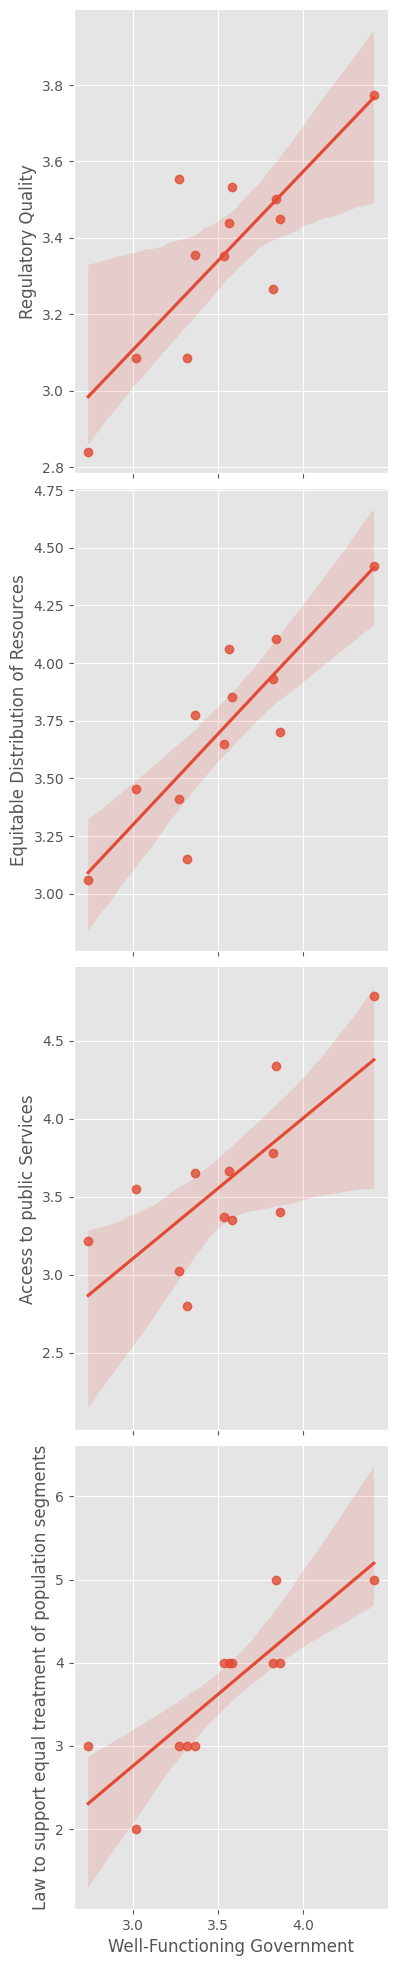

In [128]:
sns.pairplot(happiness_governance_violence, x_vars=['Well-Functioning Government'], y_vars=['Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments'],
             height=5, aspect=.8, kind="reg");

### Step 2 for the 1st research question:

Independent variables: Regulatory Quality,Equitable Distribution of Resources,Access to public Services,Law to support equal treatment of population segments

Dependent variables:
Healthy life expectancy at birth;
Generosity;
Life Ladder(People rating their life on a scale of 1-10, based on satisfaction);
Perceptions of curruption;

**This aims to test whether the capacity of the social and institutional system to serve people in a country will affect the happiness of people.**

**PS: Perceptions of corruption** are used by World Happiness Report as a reflection of good governance. In advanced countries with good governance, corruptions are more likely to be exposed (and thus be perceived) thanks to the machanism of transparency. In underdeveloped countries with bad governance, lower transparency makes corruption less exposable, but in some cases people can still perceive that through the ways government and instituions operate.

In [203]:
X_capacity=happiness_governance_violence[['Well-Functioning Government','Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy=happiness_governance_violence[['Healthy life expectancy at birth']]
X_capacity= sm.add_constant(X_capacity)

In [204]:
regression_X_capacity_Yhappy = sm.OLS(Yhappy, X_capacity)
X_capacity_Yhappy_res =regression_X_capacity_Yhappy.fit()
X_capacity_Yhappy_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Healthy life expectancy at birth   R-squared:                       0.809
Model:                                          OLS   Adj. R-squared:                  0.649
Method:                               Least Squares   F-statistic:                     5.070
Date:                              Tue, 05 Dec 2023   Prob (F-statistic):             0.0365
Time:                                      06:03:53   Log-Likelihood:                -15.878
No. Observations:                                12   AIC:                             43.76
Df Residuals:                                     6   BIC:                             46.67
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    74.9825      5.891     12.729      0.000      60.569      89.396
Well-Functioning Government                              -7.8127      2.280     -3.427      0.014     -13.391      -2.234
Regulatory Quality                                       -5.3869      3.085     -1.746      0.131     -12.936       2.163
Equitable Distribution of Resources                       7.1495      3.167      2.257      0.065      -0.600      14.899
Access to public Services                                -1.8990      1.575     -1.205      0.273      -5.754       1.956
Law to support equal treatment of population segments     2.0063      0.854      2.350      0.057      -0.083       4.095
==============================================================================
Omnibus:                        3.012   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                0.743
Skew:                          -0.460   Prob(JB):                        0.690
Kurtosis:                       3.801   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
X_capacity=happiness_governance_violence[['Well-Functioning Government','Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy1=happiness_governance_violence[['Perceptions of corruption']]
X_capacity= sm.add_constant(X_capacity)

In [206]:
regression_X_capacity_Yhappy1 = sm.OLS(Yhappy1, X_capacity)
X_capacity_Yhappy1_res =regression_X_capacity_Yhappy1.fit()
X_capacity_Yhappy1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Perceptions of corruption   R-squared:                       0.747
Model:                                   OLS   Adj. R-squared:                  0.536
Method:                        Least Squares   F-statistic:                     3.542
Date:                       Tue, 05 Dec 2023   Prob (F-statistic):             0.0776
Time:                               06:05:17   Log-Likelihood:                 19.606
No. Observations:                         12   AIC:                            -27.21
Df Residuals:                              6   BIC:                            -24.30
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.7241      0.306      2.365      0.056      -0.025       1.473
Well-Functioning Government                              -0.1763      0.118     -1.488      0.187      -0.466       0.114
Regulatory Quality                                        0.3464      0.160      2.160      0.074      -0.046       0.739
Equitable Distribution of Resources                      -0.3126      0.165     -1.899      0.106      -0.715       0.090
Access to public Services                                 0.0317      0.082      0.387      0.712      -0.169       0.232
Law to support equal treatment of population segments     0.1547      0.044      3.486      0.013       0.046       0.263
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.371
Skew:                          -0.246   Prob(JB):                        0.831
Kurtosis:                       2.293   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
X_capacity=happiness_governance_violence[['Well-Functioning Government','Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy2=happiness_governance_violence[['Generosity']]
X_capacity= sm.add_constant(X_capacity)

In [208]:
regression_X_capacity_Yhappy2 = sm.OLS(Yhappy2, X_capacity)
X_capacity_Yhappy2_res =regression_X_capacity_Yhappy2.fit()
X_capacity_Yhappy2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                 -0.129
Method:                 Least Squares   F-statistic:                    0.7482
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.616
Time:                        06:06:01   Log-Likelihood:                 12.495
No. Observations:                  12   AIC:                            -12.99
Df Residuals:                       6   BIC:                            -10.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.1952      0.554     -0.352      0.737      -1.550       1.160
Well-Functioning Government                               0.1092      0.214      0.509      0.629      -0.415       0.634
Regulatory Quality                                        0.2712      0.290      0.935      0.386      -0.438       0.981
Equitable Distribution of Resources                      -0.3915      0.298     -1.315      0.237      -1.120       0.337
Access to public Services                                 0.0622      0.148      0.420      0.689      -0.300       0.425
Law to support equal treatment of population segments     0.0587      0.080      0.731      0.492      -0.138       0.255
==============================================================================
Omnibus:                       17.621   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.636
Skew:                           1.878   Prob(JB):                      0.00180
Kurtosis:                       6.342   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X_capacity=happiness_governance_violence[['Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy3=happiness_governance_violence[['Life Ladder']]
X_capacity= sm.add_constant(X_capacity)

In [212]:
regression_X_capacity_Yhappy3 = sm.OLS(Yhappy3, X_capacity)
X_capacity_Yhappy3_res =regression_X_capacity_Yhappy3.fit()
X_capacity_Yhappy3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     1.575
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.281
Time:                        06:07:23   Log-Likelihood:                -7.7276
No. Observations:                  12   AIC:                             25.46
Df Residuals:                       7   BIC:                             27.88
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     9.0564      2.761      3.280      0.013       2.528      15.585
Regulatory Quality                                       -2.9227      1.347     -2.170      0.067      -6.107       0.262
Equitable Distribution of Resources                       1.2378      1.451      0.853      0.422      -2.193       4.669
Access to public Services                                -0.3139      0.738     -0.425      0.683      -2.060       1.432
Law to support equal treatment of population segments     0.4582      0.339      1.351      0.219      -0.344       1.260
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.048
Skew:                           0.048   Prob(JB):                        0.976
Kurtosis:                       3.294   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

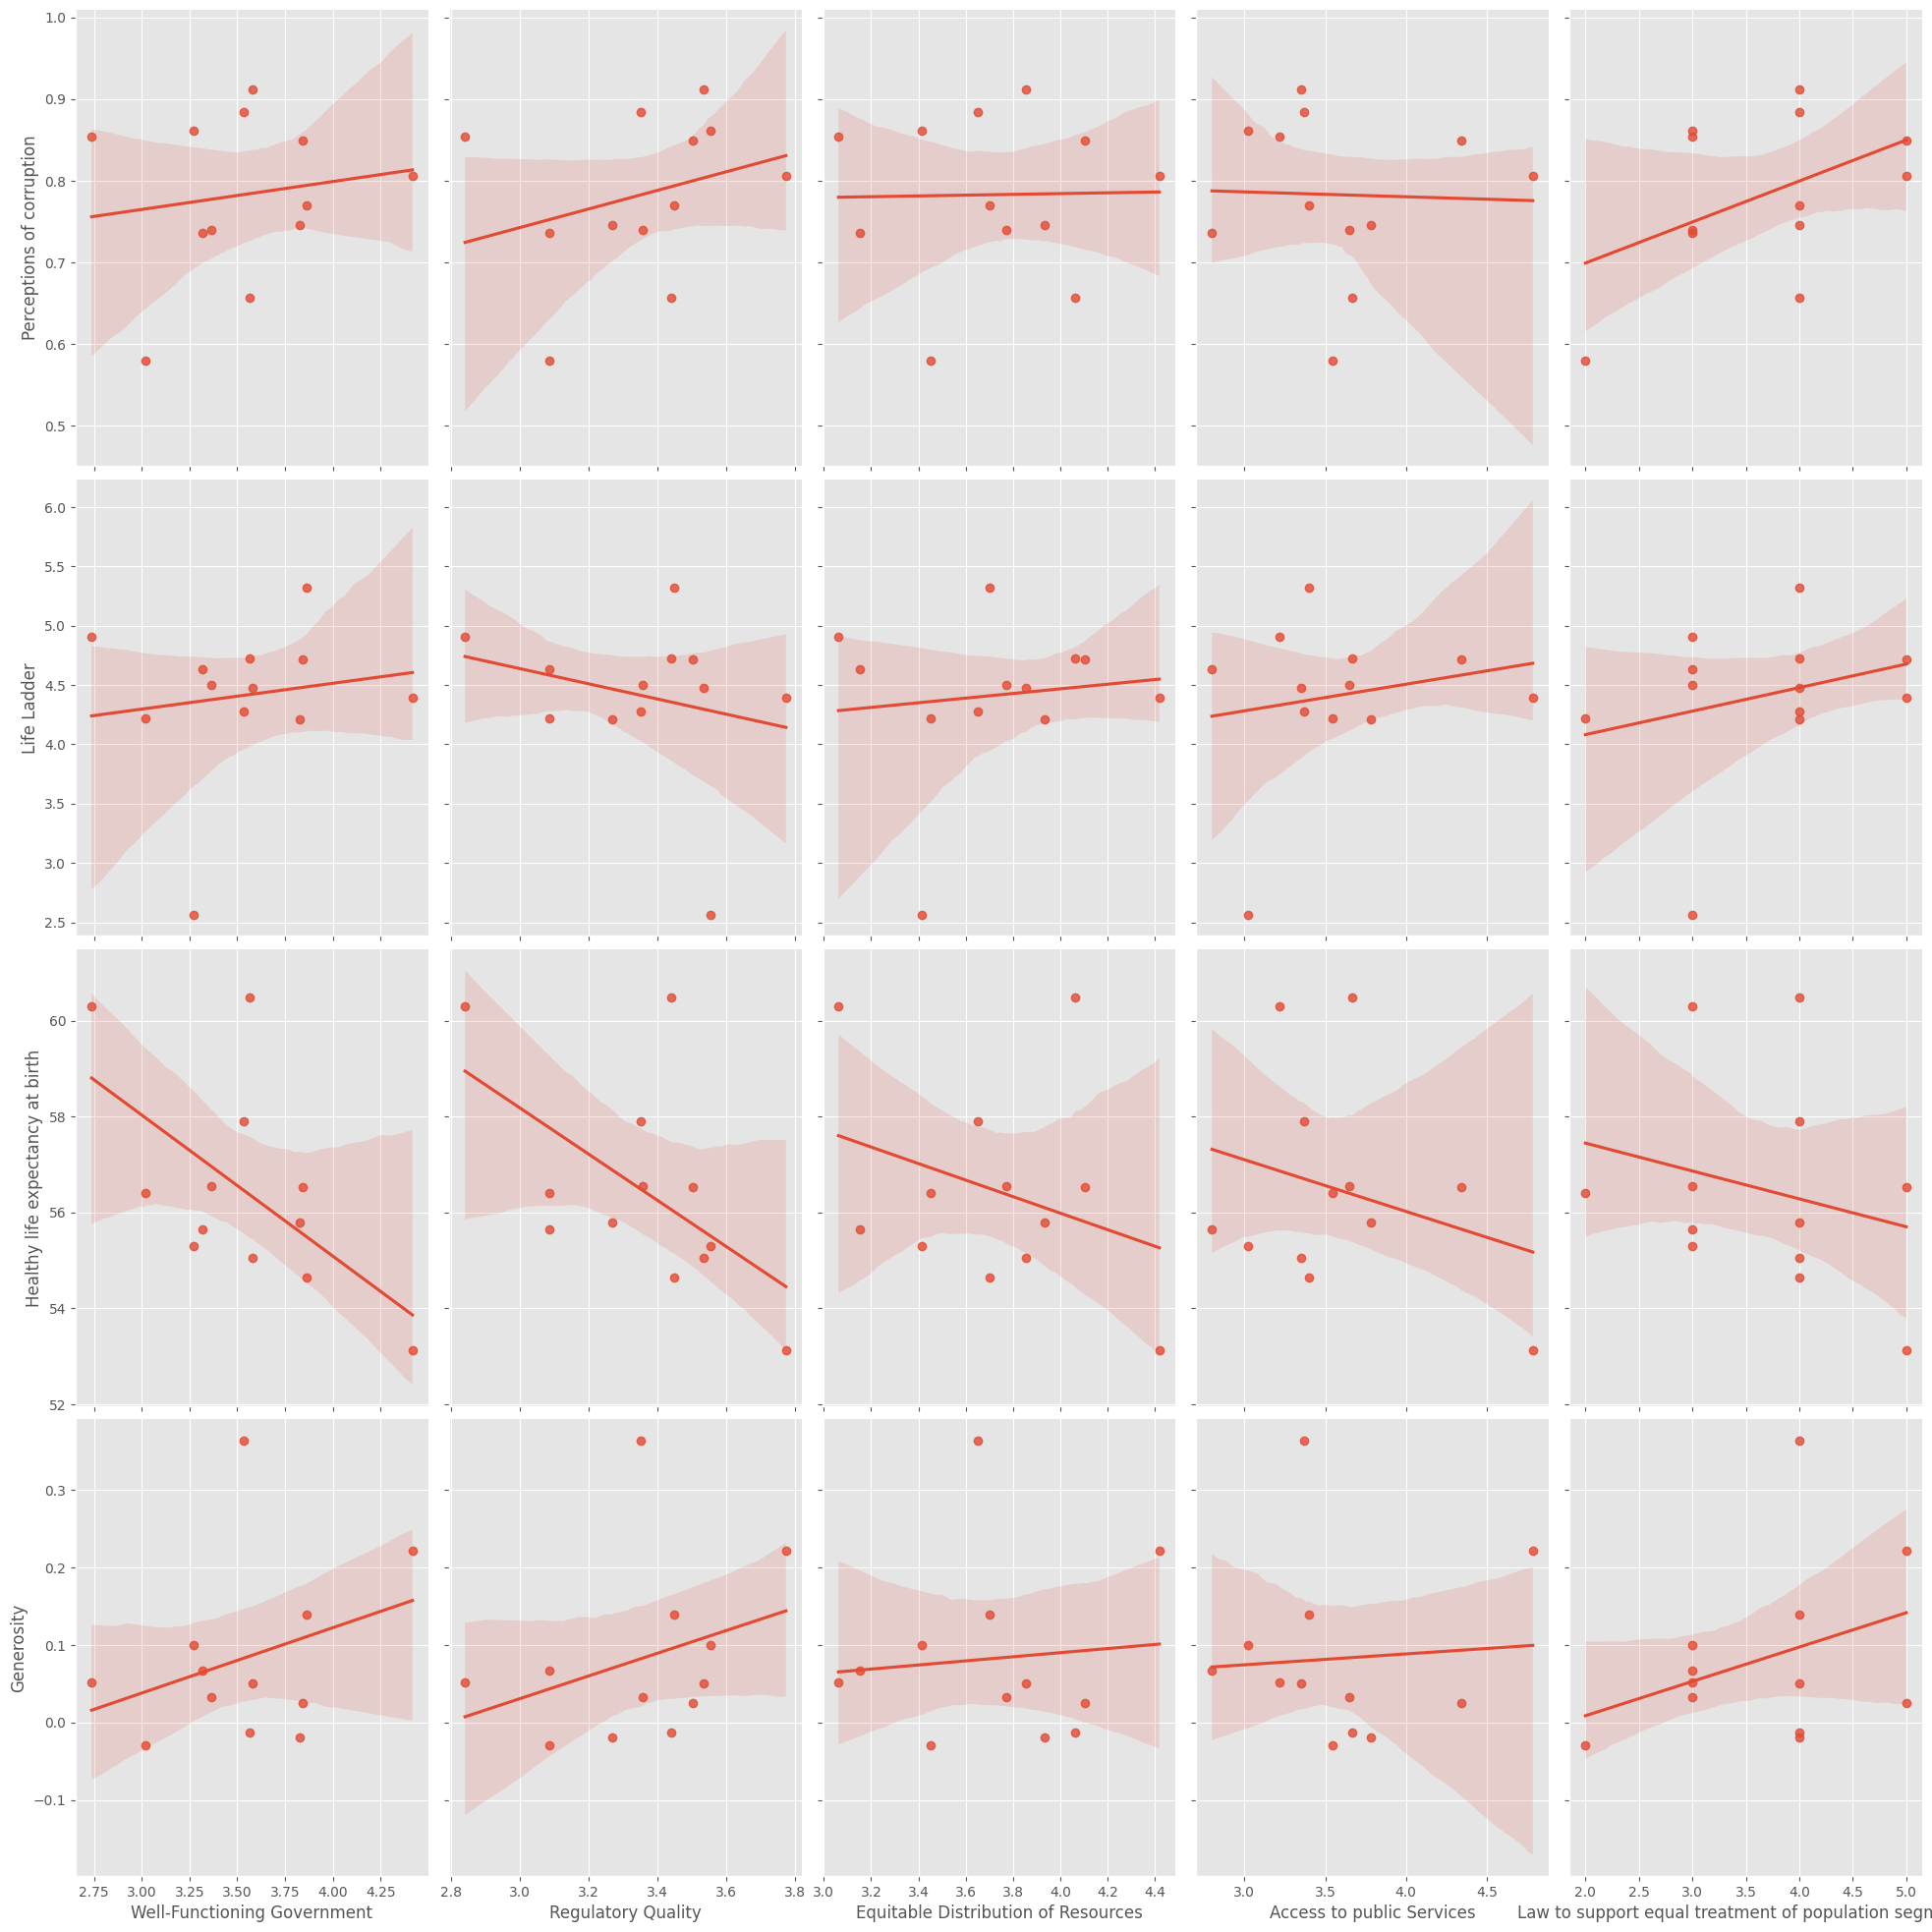

In [213]:
sns.pairplot(happiness_governance_violence, x_vars=['Well-Functioning Government','Regulatory Quality','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments'], y_vars=['Perceptions of corruption','Life Ladder','Healthy life expectancy at birth','Generosity'],
             height=5, aspect=.8, kind="reg");

## Regressions for the 2nd research question:

independent variables:

1) Insitutional variables:
Regulatory Quality,Equitable Distribution of Resources,Access to public Services,Law to support equal treatment of population segments

2) Happiness variables:
Perceptions of corruption,Life Ladder,Healthy life expectancy at birth,Generosity

dependent variable: political unrest

Fatalities (related to local political violence)
Incidents (related to local political violence)
Injuries (related to local political violence)

In [166]:
happiness_governance_violence.dtypes

Country                                                             object
year                                                                 int64
Life Ladder                                                        float64
Social support                                                     float64
Healthy life expectancy at birth                                   float64
Freedom to make life choices                                       float64
Generosity                                                         float64
Perceptions of corruption                                          float64
Positive affect                                                    float64
Negative affect                                                    float64
full                                                               float64
PPI Overall Score                                                  float64
Equitable Distribution of Resources                                float64
Well-Functioning Governme

In [167]:
happiness_governance_violence['Incidents'] = happiness_governance_violence['Incidents'].astype(float)
happiness_governance_violence['Incidents'] = pd.to_numeric(happiness_governance_violence['Incidents'], errors='coerce')

In [168]:
happiness_governance_violence['Fatalities'] = happiness_governance_violence['Fatalities'].astype(float)
happiness_governance_violence['Fatalities'] = pd.to_numeric(happiness_governance_violence['Fatalities'], errors='coerce')

In [214]:
X_happiness=happiness_governance_violence[['Well-Functioning Government','Perceptions of corruption','Regulatory Quality','Life Ladder','Generosity','Access to public Services','Healthy life expectancy at birth','Share of youth not in employment, education or training (NEET)','Law to support equal treatment of population segments']]
Yviolence=happiness_governance_violence[['Fatalities']]
X_happiness= sm.add_constant(X_happiness)

In [215]:
regression_X_happiness_Yviolence = sm.OLS(Yviolence, X_happiness)
X_happiness_Yviolence_res =regression_X_happiness_Yviolence.fit()
X_happiness_Yviolence_res.summary()
#coefficients of Fatalities on 'Life Ladder','Generosity', and 'Healthy life at birth' are negative, meaning higher happiness is correlated with fewer fatalities related to political violence.
#coefficients of Fatalities on 'youth unemployment rate' and 'Law to support equal treatment' are positive, meaning weakened social and institutional capacity to serve people's need may worsen political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     67.62
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0147
Time:                        06:09:18   Log-Likelihood:                -53.880
No. Observations:                  12   AIC:                             127.8
Df Residuals:                       2   BIC:                             132.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                           2.077e+04   2617.109      7.938      0.016    9513.540     3.2e+04
Well-Functioning Government                                     -264.4524    332.115     -0.796      0.509   -1693.427    1164.522
Perceptions of corruption                                      -2584.5572    643.981     -4.013      0.057   -5355.383     186.269
Regulatory Quality                                             -1833.1012    145.304    -12.616      0.006   -2458.293   -1207.909
Life Ladder                                                     -355.9814     37.365     -9.527      0.011    -516.750    -195.213
Generosity                                                     -2009.2276    215.177     -9.338      0.011   -2935.058   -1083.397
Access to public Services                                       -683.6554     52.525    -13.016      0.006    -909.651    -457.660
Healthy life expectancy at birth                                -200.2008     28.002     -7.149      0.019    -320.685     -79.716
Share of youth not in employment, education or training (NEET)   233.4258     19.839     11.766      0.007     148.067     318.785
Law to support equal treatment of population segments            896.1844    153.697      5.831      0.028     234.878    1557.491
==============================================================================
Omnibus:                        2.524   Durbin-Watson:                   2.952
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                0.993
Skew:                          -0.137   Prob(JB):                        0.609
Kurtosis:                       1.618   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
X_happiness=happiness_governance_violence[['Well-Functioning Government','Perceptions of corruption','Regulatory Quality','Life Ladder','Generosity','Access to public Services','Healthy life expectancy at birth','Share of youth not in employment, education or training (NEET)','Law to support equal treatment of population segments']]
Yviolence1=happiness_governance_violence[['Incidents']]
X_happiness= sm.add_constant(X_happiness)

In [217]:
regression_X_happiness_Yviolence1 = sm.OLS(Yviolence1, X_happiness)
X_happiness_Yviolence1_res =regression_X_happiness_Yviolence1.fit()
X_happiness_Yviolence1_res.summary()
#coefficients of Incidents on 'Life Ladder','Generosity', and 'Healthy life at birth' are negative, meaning higher happiness is correlated with fewer incidents of political violence.
#coefficients of Incidents on 'youth unemployment rate' and 'Law to support equal treatment' are positive, meaning weakened social and institutional capacity to serve people's need may worsen political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Incidents   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     10.91
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0867
Time:                        06:11:07   Log-Likelihood:                -49.513
No. Observations:                  12   AIC:                             119.0
Df Residuals:                       2   BIC:                             123.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                           7034.6198   1818.698      3.868      0.061    -790.607    1.49e+04
Well-Functioning Government                                     -257.5791    230.795     -1.116      0.381   -1250.611     735.453
Perceptions of corruption                                       -965.1134    447.519     -2.157      0.164   -2890.634     960.407
Regulatory Quality                                              -497.3856    100.976     -4.926      0.039    -931.848     -62.923
Life Ladder                                                     -105.3131     25.966     -4.056      0.056    -217.035       6.409
Generosity                                                      -568.6978    149.532     -3.803      0.063   -1212.082      74.686
Access to public Services                                       -184.1562     36.501     -5.045      0.037    -341.207     -27.106
Healthy life expectancy at birth                                 -69.2338     19.460     -3.558      0.071    -152.962      14.494
Share of youth not in employment, education or training (NEET)    64.4075     13.786      4.672      0.043       5.089     123.726
Law to support equal treatment of population segments            337.9619    106.808      3.164      0.087    -121.598     797.521
==============================================================================
Omnibus:                        1.221   Durbin-Watson:                   3.045
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.801
Skew:                          -0.268   Prob(JB):                        0.670
Kurtosis:                       1.854   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
X_happiness=happiness_governance_violence[['Well-Functioning Government','Perceptions of corruption','Regulatory Quality','Life Ladder','Generosity','Access to public Services','Healthy life expectancy at birth','Share of youth not in employment, education or training (NEET)','Law to support equal treatment of population segments']]
Yviolence2=happiness_governance_violence[['Injuries']]
X_happiness= sm.add_constant(X_happiness)

In [219]:
regression_X_happiness_Yviolence2 = sm.OLS(Yviolence2, X_happiness)
X_happiness_Yviolence2_res =regression_X_happiness_Yviolence2.fit()
X_happiness_Yviolence2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Injuries   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     566.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00176
Time:                        06:12:07   Log-Likelihood:                -30.641
No. Observations:                  12   AIC:                             81.28
Df Residuals:                       2   BIC:                             86.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                           8994.7697    377.380     23.835      0.002    7371.035    1.06e+04
Well-Functioning Government                                     -148.0939     47.890     -3.092      0.091    -354.148      57.960
Perceptions of corruption                                      -1171.6534     92.860    -12.617      0.006   -1571.199    -772.108
Regulatory Quality                                              -731.0840     20.952    -34.893      0.001    -821.235    -640.933
Life Ladder                                                     -143.8305      5.388    -26.695      0.001    -167.013    -120.648
Generosity                                                      -778.3156     31.028    -25.084      0.002    -911.818    -644.813
Access to public Services                                       -269.6823      7.574    -35.607      0.001    -302.270    -237.094
Healthy life expectancy at birth                                 -89.4804      4.038    -22.160      0.002    -106.854     -72.107
Share of youth not in employment, education or training (NEET)   107.8567      2.861     37.703      0.001      95.548     120.165
Law to support equal treatment of population segments            371.5817     22.163     16.766      0.004     276.223     466.940
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.670
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.400
Skew:                          -0.421   Prob(JB):                        0.819
Kurtosis:                       2.697   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

#2nd Project:

Exploring interaction between poverty, food insecurity, unemployment, and voter turnout in 2022

##Research question: how does socioeconomic disadvantage affect voter turnout in general election in 2022?

### According to Maslow (1943, 1954), human needs were arranged in a hierarchy, with survival needs at the bottom, and needs to pursue development and self-achievement at the higher level.

People are motivatied to pursue the needs at the higher level only if the needs for survival are met.

Socioeconomic disadvantage like food insecurity concerns the basic needs for survival. Voting for ideal candidates concerns the need for political participation, which helps to fulfil the high-level need to pursue development and social support.

**My assumption: the struggle to fulfill basic needs can unmotivate voters from voting, to some extent**

##Selected datasets:

Poverty rates by state 2022:https://www.statista.com/statistics/233093/us-poverty-rate-by-state/
Unemployment rates by state 2022:https://www.statista.com/statistics/223675/state-unemployment-rate-in-the-us/
Food insecurity rates by state 2022: https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/
Voter turnout rate by state 2022: https://www.electproject.org/election-data/voter-turnout-data


##Independent variables: Poverty rates, Food insecurity rates, and Unemployment rates by state

In [ ]:
poverty=pd.read_excel("https://github.com/shimjide123/datman/raw/main/us-poverty-rate-2022-by-state.xlsx")

In [ ]:
poverty.head()

,State,Poverty rate
0,United States,11.5
1,New Mexico,18.2
2,Mississippi,17.8
3,Louisiana,16.9
4,Arkansas,15.9


In [ ]:
food=pd.read_excel("https://github.com/shimjide123/datman/raw/main/mapdata2022.xlsx")

In [ ]:
food.head()

,State,Food insecurity rate,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [ ]:
unemployment=pd.read_excel("https://github.com/shimjide123/datman/raw/main/statistic_id223675_us-annual-unemployment-rate-2022-by-state.xlsx")

In [ ]:
unemployment.head()

,State,Unemployment rate
0,Nevada,5.4
1,District of Columbia,4.7
2,Illinois,4.6
3,Delaware,4.5
4,Pennsylvania,4.4


## Dependent variable: voter turnout 2022

In [ ]:
Turnout=pd.read_excel("https://github.com/shimjide123/datman/raw/main/2022%20November%20General%20Election(1).xlsx")

In [ ]:
Turnout.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.
1,Alabama*,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR


##merge

Here I merge datasets of unemployment rate and voter turnout just as an example, later I will merge all 4 datasets

In [ ]:
Turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
Turnout_unemployment['_merge'].value_counts()

both          39
left_only     13
right_only    12
Name: _merge, dtype: int64

In [ ]:
Turnout_unemployment.query("_merge=='left_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874.0,0.461620,242690810.0,261673203.0,1157707.0,1145315.13,340972.0,2643994.13,U.S.,NaN,left_only
1,Alabama*,1424087.0,0.372797,3820009.0,3977770.0,25328.0,32710.83,8245.0,66283.83,AL,NaN,left_only
13,Idaho*,595350.0,0.425940,1397732.0,1490206.0,7996.0,18918.42,5967.0,32881.42,ID,NaN,left_only
17,Kansas*,1008998.0,0.475663,2121246.0,2251251.0,8477.0,10953.06,5428.0,24858.06,KS,NaN,left_only
25,Mississippi*,709100.0,0.324705,2183828.0,2263618.0,17569.0,20026.56,10510.0,48105.56,MS,NaN,left_only
26,Missouri*,2304250.0,0.496337,4642509.0,4822855.0,22890.0,26736.81,20729.0,70355.81,MO,NaN,left_only
37,Oklahoma*,1153284.0,0.395864,2913333.0,3080502.0,22071.0,15888.63,2237.0,40196.63,OK,NaN,left_only
39,Pennsylvania*,5410022.0,0.543539,9953327.0,10366708.0,38938.0,0.00,0.0,38938.00,PA,NaN,left_only
40,Rhode Island*,361449.0,0.436272,828495.0,890835.0,2227.0,0.00,0.0,2227.00,RI,NaN,left_only
42,South Dakota*,354670.0,0.530641,668380.0,695896.0,3176.0,5209.50,3673.0,12058.50,SD,NaN,left_only


In [ ]:
Turnout_unemployment.query("_merge=='right_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
52,Pennsylvania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,right_only
53,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
54,Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
55,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,right_only
56,Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,right_only
57,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,right_only
58,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,right_only
59,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
60,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
61,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,right_only


In [ ]:
Turnout.loc[Turnout['State']=='Alabama*','State']='Alabama'
Turnout.loc[Turnout['State']=='Missouri*','State']='Missouri'
Turnout.loc[Turnout['State']=='Idaho*','State']='Idaho'
Turnout.loc[Turnout['State']=='Kansas*','State']='Kansas'
Turnout.loc[Turnout['State']=='Mississippi*','State']='Mississippi'
Turnout.loc[Turnout['State']=='Oklahoma*','State']='Oklahoma'
Turnout.loc[Turnout['State']=='Pennsylvania*','State']='Pennsylvania'
Turnout.loc[Turnout['State']=='Rhode Island*','State']='Rhode Island'
Turnout.loc[Turnout['State']=='South Dakota*','State']='South Dakota'
Turnout.loc[Turnout['State']=='Tennessee*','State']='Tennessee'
Turnout.loc[Turnout['State']=='Texas*','State']='Texas'
Turnout.loc[Turnout['State']=='Wisconsin*','State']='Wisconsin'

 #at the later stage I will do all of the replace on condition

In [ ]:
turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
turnout_unemployment['_merge'].value_counts() #only the voter turnout dataset shows an average figure in the US, thats why it does not merge

both          51
left_only      1
right_only     0
Name: _merge, dtype: int64

In [ ]:
turnout_unemployment.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,both


##Plotting and regression

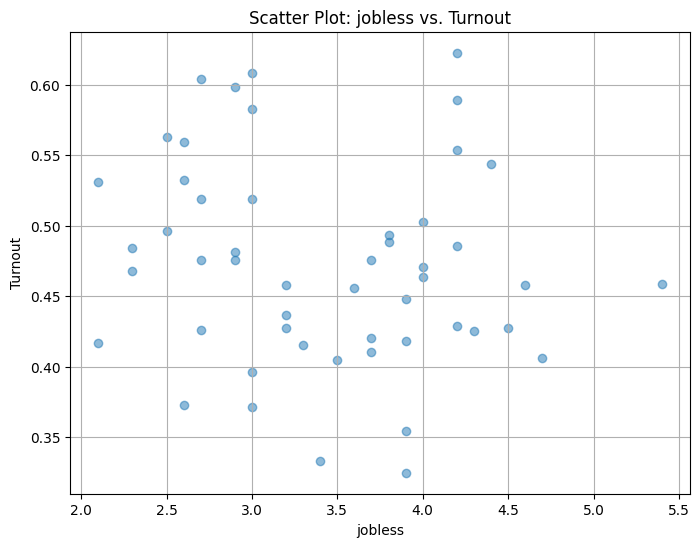

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
import seaborn as sns

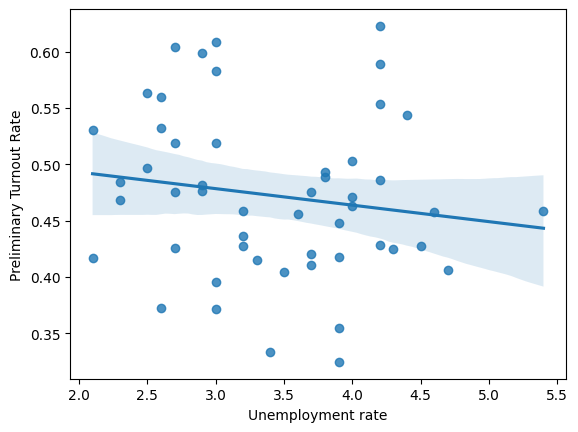

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
#this is the multiple regression code I aim to use for the next, I will adjust it for the datasets I used later
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
